# Unlocking Automotive Trends Project - Part 1

In [47]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import norm #probability distribution function
import warnings
warnings.filterwarnings("ignore")

In [48]:
# Reading data from existing .csv file using read_csv() of pandas module and storing into a dataframe
car_data = pd.read_excel("D:/Documents/NIIT/Course4/Sprint9/DS1_C4_S9_Car_Data.xlsx")
car_data

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,City_Mileage_km_litre,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,687,Mahindra,E Verito,D4,72.0,NaN,NaN,NaN,Electric,110.0,...,NaN,Yes,Yes,NaN,NaN,NaN,1700 kg,NaN,NaN,NaN
1,688,Mahindra,E Verito,D2,72.0,NaN,NaN,NaN,Electric,110.0,...,NaN,Yes,Yes,NaN,NaN,NaN,1700 kg,NaN,NaN,NaN
2,689,Mahindra,E Verito,D6,72.0,NaN,NaN,NaN,Electric,110.0,...,Yes,Yes,Yes,NaN,NaN,NaN,1700 kg,NaN,Yes,NaN
3,615,Mahindra,E2O Plus,P4,NaN,NaN,NaN,NaN,Electric,80.0,...,NaN,Yes,Yes,NaN,NaN,NaN,1257 kg,NaN,Yes,Yes
4,616,Mahindra,E2O Plus,P6,NaN,NaN,NaN,NaN,Electric,80.0,...,NaN,Yes,Yes,NaN,NaN,NaN,1257 kg,NaN,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1250,Skoda,Octavia,Onyx 2.0 Tdi Dsg,1968.0,4.0,4.0,50.0,Diesel,NaN,...,Yes,Yes,Yes,"Comfort, Eco, Sport, Normal",Yes,Yes,1915 kg,"Drive side airbag, Driver frontal airbag, Fron...",Yes,Yes
1272,1251,Mercedes-Benz,Mercedes-Benz Glc,200 Progressive,1991.0,4.0,4.0,66.0,Petrol,NaN,...,Yes,Yes,Yes,"Normal, Comfort, Eco, Sport",Yes,Yes,2360 kg,"Front passenger curtain airbag, Driver curtain...",Yes,Yes
1273,1252,Mercedes-Benz,Mercedes-Benz Glc,220D 4Matic Progressive,1950.0,4.0,4.0,50.0,Diesel,NaN,...,Yes,Yes,Yes,"Normal, Comfort, Eco, Sport",Yes,Yes,2500 kg,"Front passenger curtain airbag, Driver curtain...",Yes,Yes
1274,1253,Porsche,Cayenne Coupe,Base,2995.0,6.0,4.0,75.0,Petrol,NaN,...,Yes,Yes,Yes,"Normal, Eco, Sport",Yes,Yes,2105 kg,"Driver pelvic airbag, Driver curtain airbag, R...",Yes,Yes


## Data Preprocessing

In [50]:
# Counting missing values in each column
missing_values = car_data.isnull().sum()
print('Missing values in each column:\n', missing_values)

Missing values in each column:
 S. No.                               0
Make                                 0
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            0
Doors                                4
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                       1081
High_Speed_Alert_System         

In [51]:
# Grouping by manufacturer and replacing the missing values with mean for numerical columns
numerical_cols = car_data.select_dtypes(include=['float64', 'int64']).columns
car_data[numerical_cols] = car_data[numerical_cols].fillna(car_data[numerical_cols].mean())

# Replacing missing values in categorical columns with "Not Available"
categorical_cols = car_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    car_data[col] = car_data[col].fillna('Not Available')

# Printing the cleaned dataframe
car_data

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,City_Mileage_km_litre,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,687,Mahindra,E Verito,D4,72.000000,4.380992,3.977853,52.119221,Electric,110.000000,...,Not Available,Yes,Yes,Not Available,Not Available,Not Available,1700 kg,Not Available,Not Available,Not Available
1,688,Mahindra,E Verito,D2,72.000000,4.380992,3.977853,52.119221,Electric,110.000000,...,Not Available,Yes,Yes,Not Available,Not Available,Not Available,1700 kg,Not Available,Not Available,Not Available
2,689,Mahindra,E Verito,D6,72.000000,4.380992,3.977853,52.119221,Electric,110.000000,...,Yes,Yes,Yes,Not Available,Not Available,Not Available,1700 kg,Not Available,Yes,Not Available
3,615,Mahindra,E2O Plus,P4,1858.804589,4.380992,3.977853,52.119221,Electric,80.000000,...,Not Available,Yes,Yes,Not Available,Not Available,Not Available,1257 kg,Not Available,Yes,Yes
4,616,Mahindra,E2O Plus,P6,1858.804589,4.380992,3.977853,52.119221,Electric,80.000000,...,Not Available,Yes,Yes,Not Available,Not Available,Not Available,1257 kg,Not Available,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1250,Skoda,Octavia,Onyx 2.0 Tdi Dsg,1968.000000,4.000000,4.000000,50.000000,Diesel,15.815381,...,Yes,Yes,Yes,"Comfort, Eco, Sport, Normal",Yes,Yes,1915 kg,"Drive side airbag, Driver frontal airbag, Fron...",Yes,Yes
1272,1251,Mercedes-Benz,Mercedes-Benz Glc,200 Progressive,1991.000000,4.000000,4.000000,66.000000,Petrol,15.815381,...,Yes,Yes,Yes,"Normal, Comfort, Eco, Sport",Yes,Yes,2360 kg,"Front passenger curtain airbag, Driver curtain...",Yes,Yes
1273,1252,Mercedes-Benz,Mercedes-Benz Glc,220D 4Matic Progressive,1950.000000,4.000000,4.000000,50.000000,Diesel,15.815381,...,Yes,Yes,Yes,"Normal, Comfort, Eco, Sport",Yes,Yes,2500 kg,"Front passenger curtain airbag, Driver curtain...",Yes,Yes
1274,1253,Porsche,Cayenne Coupe,Base,2995.000000,6.000000,4.000000,75.000000,Petrol,15.815381,...,Yes,Yes,Yes,"Normal, Eco, Sport",Yes,Yes,2105 kg,"Driver pelvic airbag, Driver curtain airbag, R...",Yes,Yes


In [52]:
# Counting missing values in each column after data preprocessing
missing_values = car_data.isnull().sum()
print('Missing values in each column:\n', missing_values)

Missing values in each column:
 S. No.                            0
Make                              0
Model                             0
Variant                           0
Displacement                      0
Cylinders                         0
Valves_Per_Cylinder               0
Fuel_Tank_Capacity_litre          0
Fuel_Type                         0
City_Mileage_km_litre             0
Highway_Mileage_km_litre          0
Height_mm                         0
Length_mm                         0
Width_mm                          0
Body_Type                         0
Doors                             0
Kerb_Weight                       0
Power                             0
Torque                            0
Seating_Capacity                  0
Central_Locking                   0
Child_Safety_Locks                0
Hill_Assist                       0
Drive_Modes                       0
High_Speed_Alert_System           0
ABS_(Anti-lock_Braking_System)    0
Gross_Vehicle_Weight            

## Market Segmentation Analysis

### Task 1

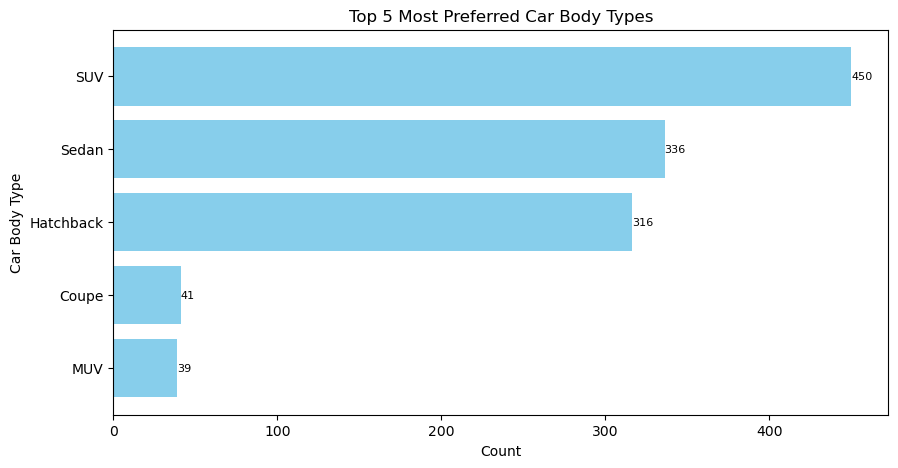


Interpretation: SUV is the most preferred car body type followed by Sedan and Hatchback.


In [55]:
# Grouping by car body type and counting
top_body_types = car_data['Body_Type'].value_counts().head(5)
top_body_types = top_body_types.sort_values() #sorting values

# Setting the figure size
plt.figure(figsize=(10, 5))

# Creating the horizontal bar chart
bars = plt.barh(top_body_types.index, 
               top_body_types.values,
               color='skyblue')
plt.title('Top 5 Most Preferred Car Body Types')
plt.xlabel('Count')
plt.ylabel('Car Body Type')
plt.bar_label(bars,
             labels=top_body_types.values,
             label_type='edge',
             fontsize=8)
plt.show()

#Interpretation
print('\nInterpretation: SUV is the most preferred car body type followed by Sedan and Hatchback.')

### Task 2

In [103]:
# Filtering for cars with all specified driving modes
drive_modes = ['Normal', 'Comfort', 'Eco', 'Sport', 'Power']
filtered_modes = car_data['Drive_Modes'].str.contains(r'.*'.join(f'(?=.*{mode})' for mode in drive_modes), case=False) # Using regular expressions
cars_with_all_modes = car_data[filtered_modes]

# Counting the number of cars with all modes
count_cars_with_all_modes = len(cars_with_all_modes)

# Printing the results
print("Details of cars that can adapt to various driving conditions such as normal, comfort, eco, sport, and power mode:\n")
print(cars_with_all_modes)
print('\nTotal cars with all driving modes:', count_cars_with_all_modes)

#Interpretation
print('\nInterpretation: Only 2 cars can adapt to various driving conditions such as normal, comfort, eco, sport, and power and both are made by Audi.')

Details of cars that can adapt to various driving conditions such as normal, comfort, eco, sport, and power mode:

     S. No.  Make Model                    Variant  Displacement  Cylinders  \
829     321  Audi    Q8  55 Tfsi Quattro Tiptronic        2995.0        4.0   
832     330  Audi  A8 L            55 Tfsi Quattro        2995.0        8.0   

     Valves_Per_Cylinder  Fuel_Tank_Capacity_litre Fuel_Type  \
829                  4.0                      85.0    Petrol   
832                  4.0                      82.0    Petrol   

     City_Mileage_km_litre  ...  Child_Safety_Locks  Hill_Assist  \
829              15.815381  ...                 Yes          Yes   
832              15.815381  ...                 Yes          Yes   

                            Drive_Modes  High_Speed_Alert_System  \
829  Normal, Comfort, Eco, Sport, Power                      Yes   
832  Normal, Comfort, Eco, Sport, Power                      Yes   

    ABS_(Anti-lock_Braking_System)  Gross_Ve

## Fuel Efficiency Analysis

### Task 3

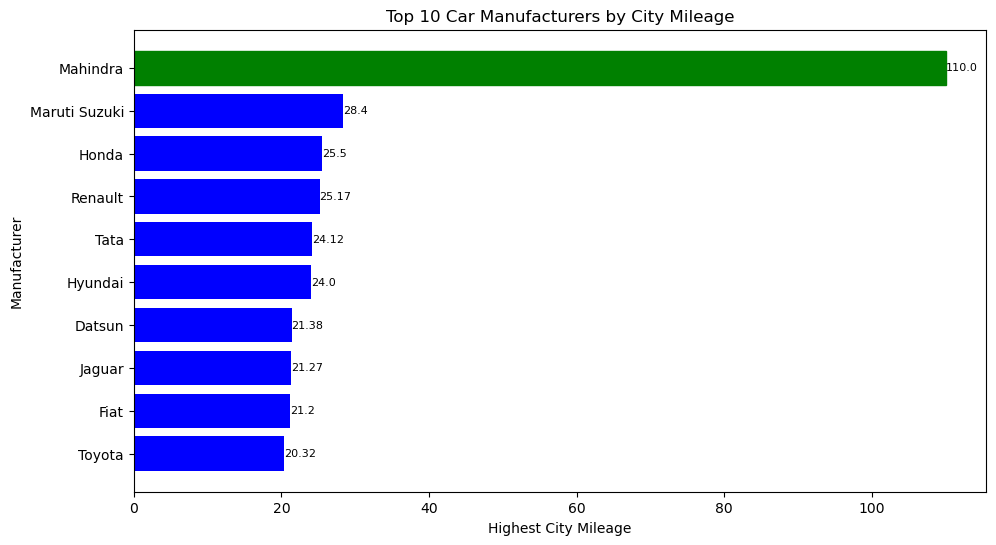


Interpretation: Mahindra has the highest city mileage (110) of all manufacturers. It is an outlier between all manufacturers as its car is electric in nature, thereby recording extraordinary city mileage. For correct analysis, only cars which are non-electric should be considered.


In [60]:
# Grouping by manufacturer and calculating highest city mileage for them and filtering for top 10
top_manu = car_data.groupby('Make')['City_Mileage_km_litre'].max().nlargest(10)
top_manu = top_manu.sort_values() #sorting values

# Setting the figure size
plt.figure(figsize=(11, 6))

# Creating the horizontal bar chart
bars = plt.barh(top_manu.index, 
               top_manu.values,
               color='blue')
bars[9].set_color('green')
plt.title('Top 10 Car Manufacturers by City Mileage')
plt.xlabel('Highest City Mileage')
plt.ylabel('Manufacturer')
plt.bar_label(bars,
             labels=top_manu.values,
             label_type='edge',
             fontsize=8)
plt.show()

#Interpretation
print('\nInterpretation: Mahindra has the highest city mileage (110) of all manufacturers. It is an outlier between all manufacturers as its car is electric in nature, thereby recording extraordinary city mileage. For correct analysis, only cars which are non-electric should be considered.')

### Task 4

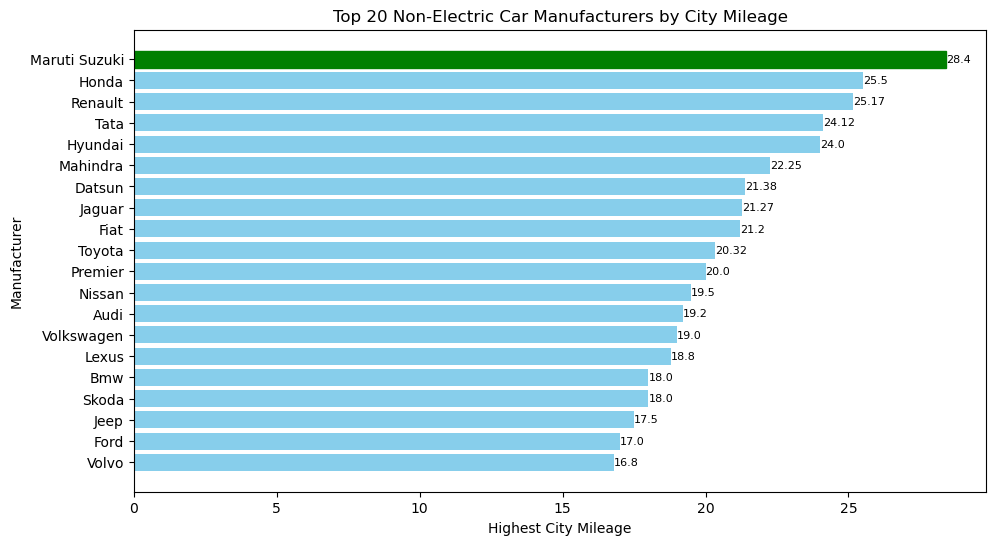


Interpretation: Maruti Suzuki has the highest city mileage (28.4) of all manufacturers which make non-electric cars, followed by Honda and Renault.


In [105]:
# Filtering for non-electric cars
non_electric = car_data[car_data['Fuel_Type'] != 'Electric']

# Grouping by manufacturer and calculating highest city mileage for them and filtering for top 20
top_manuf = non_electric.groupby('Make')['City_Mileage_km_litre'].max().nlargest(20)
top_manuf = top_manuf.sort_values() #sorting values

# Setting the figure size
plt.figure(figsize=(11, 6))

# Creating the horizontal bar chart
bars = plt.barh(top_manuf.index, 
               top_manuf.values,
               color='skyblue')
bars[19].set_color('green')
plt.title('Top 20 Non-Electric Car Manufacturers by City Mileage')
plt.xlabel('Highest City Mileage')
plt.ylabel('Manufacturer')
plt.bar_label(bars,
             labels=top_manuf.values,
             label_type='edge',
             fontsize=8)
plt.show()

#Interpretation
print('\nInterpretation: Maruti Suzuki has the highest city mileage (28.4) of all manufacturers which make non-electric cars, followed by Honda and Renault.')

### Task 5

In [64]:
# Filtering data for the specified manufacturers
manu = ['Hyundai', 'Mahindra', 'Renault', 'Skoda']
filtered_data = car_data[car_data['Make'].isin(manu)]

# Creating pivot tables for each metric
pivot_mean_city = filtered_data.pivot_table(index='Make', values='City_Mileage_km_litre', aggfunc='mean')
pivot_median_city = filtered_data.pivot_table(index='Make', values='City_Mileage_km_litre', aggfunc='median')
pivot_mean_highway = filtered_data.pivot_table(index='Make', values='Highway_Mileage_km_litre', aggfunc='mean')
pivot_median_highway = filtered_data.pivot_table(index='Make', values='Highway_Mileage_km_litre', aggfunc='median')

# Printing the pivot tables in a formatted way
print("Mean City Mileage:\n")
print(pivot_mean_city.to_markdown(numalign="left", stralign="left"))
print("\nMedian City Mileage:\n")
print(pivot_median_city.to_markdown(numalign="left", stralign="left"))
print("\nMean Highway Mileage:\n")
print(pivot_mean_highway.to_markdown(numalign="left", stralign="left"))
print("\nMedian Highway Mileage:\n")
print(pivot_median_highway.to_markdown(numalign="left", stralign="left"))

#Interpretation
print('\nInterpretations:')
print('\n1. Renault and Mahindra have high average city mileages, indicating better fuel efficiency in urban conditions. While Skoda is the worst out of them.')
print('\n2. For Mahindra the median is lower than the mean, suggesting that there might be some outliers (e.g., models with very high mileage) whereas Hyundai and Skoda have median similar as the mean, indicating a relatively consistent performance.')
print('\n3. The mean highway mileage is similar for all manufacturers, indicating a relatively same performance on highways.')
print('\n4. The median highway mileage is similar to the mean for all manufacturers, indicating a relatively consistent performance on highways.')

Mean City Mileage:

| Make     | City_Mileage_km_litre   |
|:---------|:------------------------|
| Hyundai  | 16.2676                 |
| Mahindra | 19.0887                 |
| Renault  | 19.5012                 |
| Skoda    | 14.5163                 |

Median City Mileage:

| Make     | City_Mileage_km_litre   |
|:---------|:------------------------|
| Hyundai  | 15.8154                 |
| Mahindra | 15.8154                 |
| Renault  | 21.04                   |
| Skoda    | 15.1                    |

Mean Highway Mileage:

| Make     | Highway_Mileage_km_litre   |
|:---------|:---------------------------|
| Hyundai  | 17.3258                    |
| Mahindra | 17.4835                    |
| Renault  | 17.0823                    |
| Skoda    | 17.1871                    |

Median Highway Mileage:

| Make     | Highway_Mileage_km_litre   |
|:---------|:---------------------------|
| Hyundai  | 16.8797                    |
| Mahindra | 16.8797                    |
| Renault  | 16.879

### Task 6

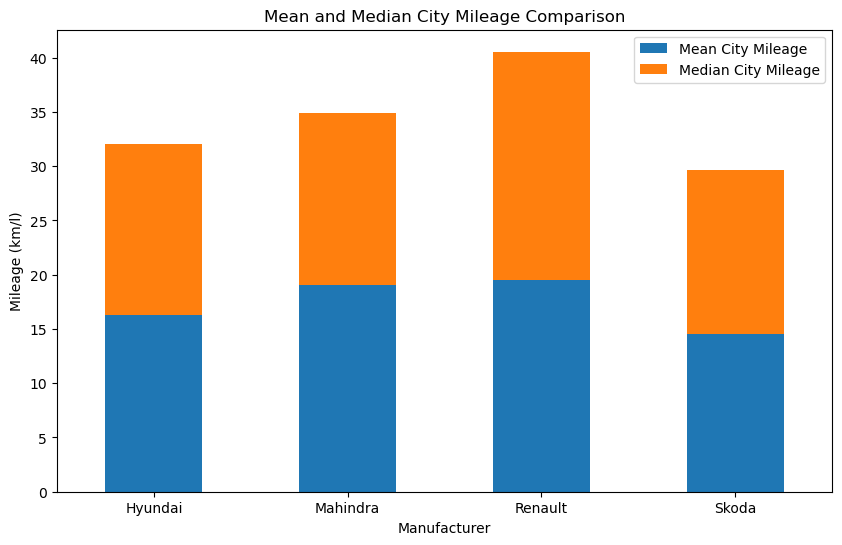


Interpretation: Renault has the highest combined (mean + median) city mileage of these four manufacturers while Skoda has the lowest.


In [66]:
# Creating a new DataFrame with the mean and median values
combined_city_data = pd.DataFrame({'Mean City Mileage': pivot_mean_city['City_Mileage_km_litre'],
                                  'Median City Mileage': pivot_median_city['City_Mileage_km_litre']})

# Creating the stacked column chart
bars = combined_city_data.plot(kind='bar',
                              stacked=True,
                              figsize=(10,6))
plt.title('Mean and Median City Mileage Comparison')
plt.xlabel('Manufacturer')
plt.ylabel('Mileage (km/l)')
plt.xticks(rotation=0) #rotating the x-axis labels for better readability
plt.legend()
plt.show()

#Interpretation
print('\nInterpretation: Renault has the highest combined (mean + median) city mileage of these four manufacturers while Skoda has the lowest.')

### Task 7

<Figure size 1200x800 with 0 Axes>

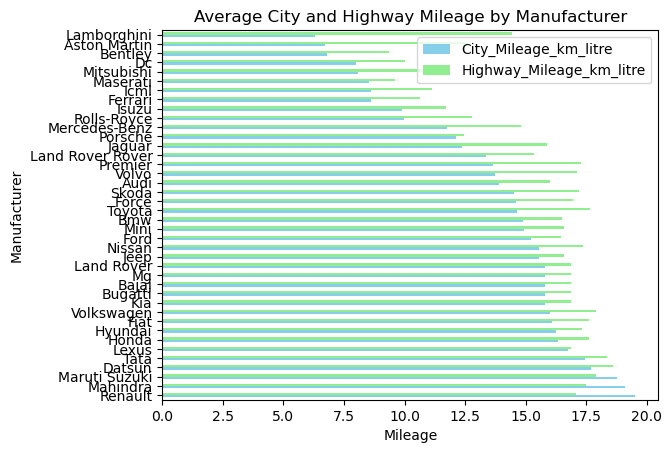


Interpretation: Renault has the highest average city and highway mileage of all manufacturers, followed by Mahindra and Maruti Suzuki.


In [68]:
# Calculating average city and highway mileage for each manufacturer
avg_mileage = car_data.groupby('Make')[['City_Mileage_km_litre', 'Highway_Mileage_km_litre']].mean(numeric_only=True)

# Sorting the DataFrame by average city mileage in ascending order
avg_mileage = avg_mileage.sort_values(by='City_Mileage_km_litre', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Creating horizontal bar chart
avg_mileage.plot(x=None, 
                 kind='barh', 
                 color=['skyblue', 'lightgreen'])
plt.title('Average City and Highway Mileage by Manufacturer')
plt.xlabel('Mileage')
plt.ylabel('Manufacturer')
plt.show()

#Interpretation
print('\nInterpretation: Renault has the highest average city and highway mileage of all manufacturers, followed by Mahindra and Maruti Suzuki.')

### Task 8

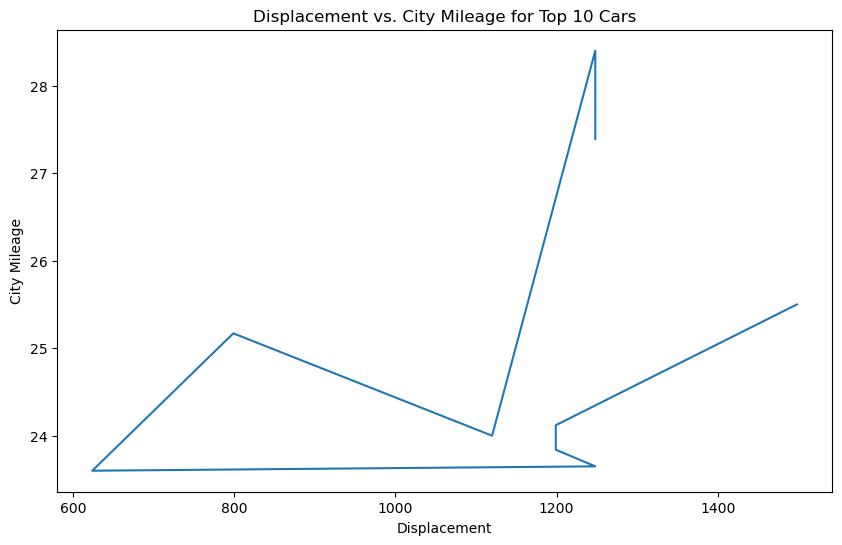


Interpretation: There is weak negative correlation between displacement and city mileage. Cars with smaller engines (lower displacement) tend to have higher city mileage, while cars with larger engines might have lower city mileage.


In [70]:
# Filtering for non-electric cars
non_electric = car_data[car_data['Fuel_Type'] != 'Electric']

# Grouping by models and calculating highest city mileage for them and filtering for top 10
top_models = non_electric.groupby('Model')['City_Mileage_km_litre'].max().nlargest(10)
top_models = top_models.sort_values() #sorting values

# Filtering the DataFrame to include only these top 10 models (no variants)
top_10_cars = car_data[car_data['Model'].isin(top_models.index)].groupby('Model').first()

# Creating the line chart
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(top_10_cars['Displacement'], top_10_cars['City_Mileage_km_litre'])
plt.title('Displacement vs. City Mileage for Top 10 Cars')
plt.xlabel('Displacement')
plt.ylabel('City Mileage')
plt.show()

#Interpretation
print('\nInterpretation: There is weak negative correlation between displacement and city mileage. Cars with smaller engines (lower displacement) tend to have higher city mileage, while cars with larger engines might have lower city mileage.')

### Task 9

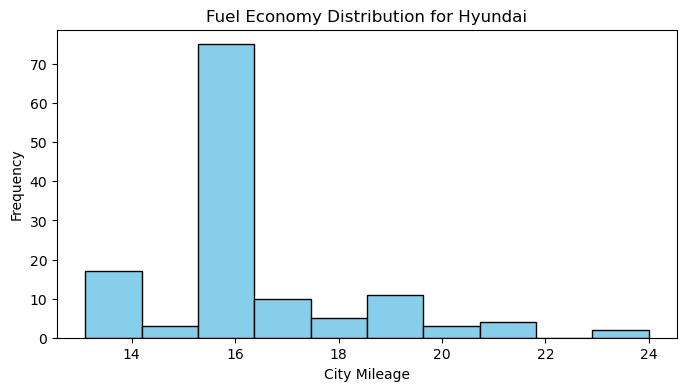

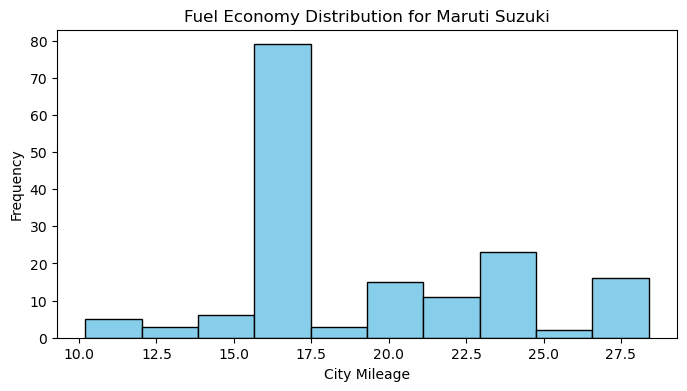

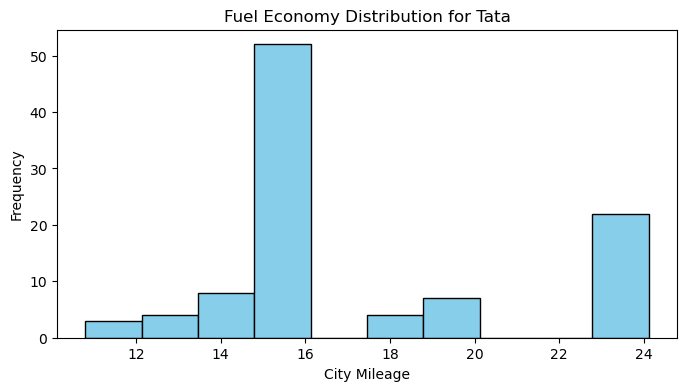

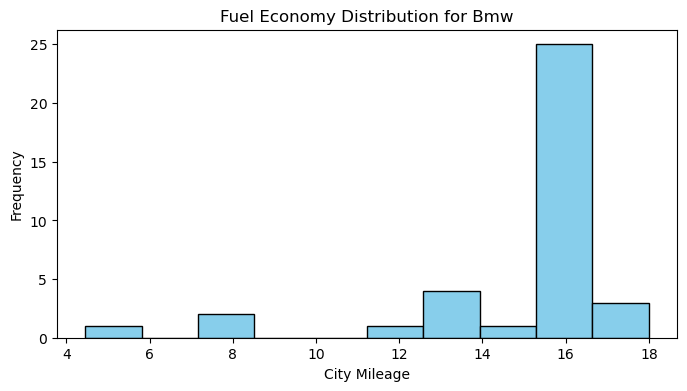


Interpretations:

1. Fuel Economy Distribution for Hyundai, Maruti Suzuki and Tata is right-skewed (positively skewed) while it is left-skewed (negatively skewed) for BMW.

2. BMW has the most skewed mileage distribution out of these manufacturers.

3. There are few outliers present in the Fuel Economy Distribution for Tata and BMW.


In [72]:
# Filtering data for the specified manufacturers
manuf = ['Hyundai', 'Maruti Suzuki', 'Tata', 'Bmw']
filtered_data1 = car_data[car_data['Make'].isin(manuf)]

# Creating separate histograms for each manufacturer
for manufacturer in manuf:
    manuf_data = filtered_data1[filtered_data1['Make'] == manufacturer]['City_Mileage_km_litre']
    plt.figure(figsize=(8,4))
    plt.hist(manuf_data, color='skyblue', edgecolor='black')
    plt.title(f'Fuel Economy Distribution for {manufacturer}')
    plt.xlabel('City Mileage')
    plt.ylabel('Frequency')
    plt.show()

#Interpretation
print('\nInterpretations:')
print('\n1. Fuel Economy Distribution for Hyundai, Maruti Suzuki and Tata is right-skewed (positively skewed) while it is left-skewed (negatively skewed) for BMW.')
print('\n2. BMW has the most skewed mileage distribution out of these manufacturers.')
print('\n3. There are few outliers present in the Fuel Economy Distribution for Tata and BMW.')

### Task 10

In [74]:
# Filtering the specified columns
selected_cols = ['Make', 'Displacement', 'Valves_Per_Cylinder', 'Power', 'Torque', 'Kerb_Weight', 'Gross_Vehicle_Weight', 'Fuel_Tank_Capacity_litre',
                 'City_Mileage_km_litre', 'Highway_Mileage_km_litre']

# Creating a new DataFrame with only the selected columns
new_data = car_data[selected_cols]

# Counting missing values in each column if any
missing_values = new_data.isnull().sum()
print('Missing values in each column:\n', missing_values)

# Printing the DataFrame to verify
print(new_data)

#Interpretation
print('\nInterpretation: A new data frame is created that includes only the selected columns from the data. Missing value treatment is not required as there are no missing values.')

Missing values in each column:
 Make                        0
Displacement                0
Valves_Per_Cylinder         0
Power                       0
Torque                      0
Kerb_Weight                 0
Gross_Vehicle_Weight        0
Fuel_Tank_Capacity_litre    0
City_Mileage_km_litre       0
Highway_Mileage_km_litre    0
dtype: int64
               Make  Displacement  Valves_Per_Cylinder  Power  Torque  \
0          Mahindra     72.000000             3.977853   41.0    91.0   
1          Mahindra     72.000000             3.977853   41.0    91.0   
2          Mahindra     72.000000             3.977853   41.0    91.0   
3          Mahindra   1858.804589             3.977853   25.8    70.0   
4          Mahindra   1858.804589             3.977853   25.8    70.0   
...             ...           ...                  ...    ...     ...   
1271          Skoda   1968.000000             4.000000  143.0   320.0   
1272  Mercedes-Benz   1991.000000             4.000000  197.0   320.0  

### Task 11

In [76]:
# Function to remove "kg" and convert to pounds
def conv_to_pounds(weight_str):
    try:
        weight_str = weight_str.replace('kg','')
        weight_kg = float(weight_str)
        weight_lbs = weight_kg*2.2
        return weight_lbs
    except ValueError:  # Handling cases where weight_str cannot be converted to float
        return None  # Replacing with NaN

# Applying the function to the specified columns
car_data['Kerb_Weight'] = car_data['Kerb_Weight'].apply(conv_to_pounds)
car_data['Gross_Vehicle_Weight'] = car_data['Gross_Vehicle_Weight'].apply(conv_to_pounds)

# Printing the DataFrame to verify
print(car_data)

#Interpretation
print('\nInterpretation: A function which removes "kg" from weight and converts it from kg to pounds is created. It also checks for different datatypes and replaces it with NaN if it cannot be converted into float.')

      S. No.           Make              Model                  Variant  \
0        687       Mahindra           E Verito                       D4   
1        688       Mahindra           E Verito                       D2   
2        689       Mahindra           E Verito                       D6   
3        615       Mahindra           E2O Plus                       P4   
4        616       Mahindra           E2O Plus                       P6   
...      ...            ...                ...                      ...   
1271    1250          Skoda            Octavia         Onyx 2.0 Tdi Dsg   
1272    1251  Mercedes-Benz  Mercedes-Benz Glc          200 Progressive   
1273    1252  Mercedes-Benz  Mercedes-Benz Glc  220D 4Matic Progressive   
1274    1253        Porsche      Cayenne Coupe                     Base   
1275    1254        Porsche      Cayenne Coupe                    Turbo   

      Displacement  Cylinders  Valves_Per_Cylinder  Fuel_Tank_Capacity_litre  \
0        72.000000 

## Performance Comparison

### Task 12

Comparing the performance of cars based on factors such as displacement, cylinders, and valves per cylinder:

                 Displacement                                             \
                        count         mean          std     min      25%   
Make                                                                       
Aston Martin              3.0  5038.333333   986.241519  3982.0  4590.00   
Audi                     31.0  2256.354839   836.304352  1395.0  1968.00   
Bajaj                     2.0   216.000000     0.000000   216.0   216.00   
Bentley                   6.0  5447.833333  1164.710164  3993.0  4484.50   
Bmw                      37.0  2707.918919   924.567237  1995.0  1995.00   
Bugatti                   2.0  7993.000000     0.000000  7993.0  7993.00   
Datsun                   24.0  1114.916667   154.685914   799.0  1148.25   
Dc                        1.0  2000.000000          NaN  2000.0  2000.00   
Ferrari                   8.0  4589.500000  1125.89164

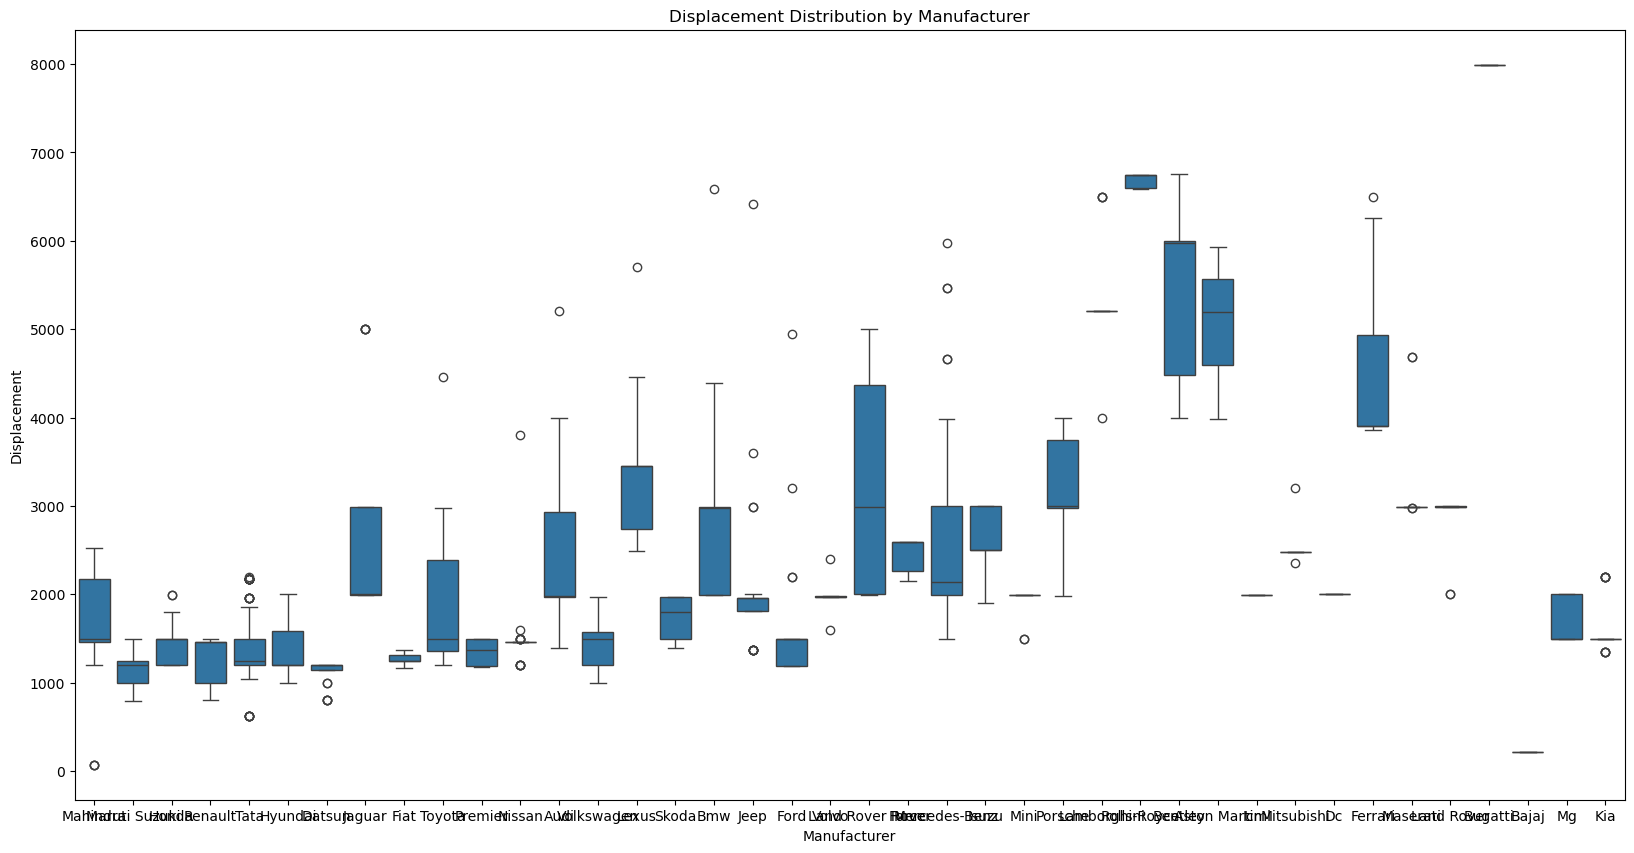


Interpretations:

1. Aston Martin, Bentley, Bugatti, Ferrari, Lamborghini and Rolls-Royce have significantly higher mean and median displacements, indicating larger engines.

2. Bentley, Ferrari, Jaguar, Land Rover Rover and Mercedes-Benz have higher standard deviations, suggesting more variation in their engine sizes.

3. Aston Martin, Bentley, Bugatti, Lamborghini and Rolls-Royce have higher mean cylinder counts, meaning they use more cylinders on average.

4. Most manufacturers have a mean of 4 valves per cylinder. Audi, Lamborghini, Lexus and Nissan have higher, indicating more advanced engine designs.

5. Manufacturers with higher displacement and cylinder counts target customers seeking powerful and performance-oriented vehicles.

6. Manufacturers with lower displacement and fewer cylinders focus on fuel efficiency and environmental friendliness.

7. Manufacturers can differentiate their products based on engine specifications, targeting specific market segments.

8. Manufacture

In [79]:
# Calculating and displaying summary statistics for each manufacturer
summary_stats = car_data.groupby('Make')[['Displacement', 'Cylinders', 'Valves_Per_Cylinder']].describe()
print('Comparing the performance of cars based on factors such as displacement, cylinders, and valves per cylinder:\n')
print(summary_stats)

# Create a new DataFrame to store the results
stats_df = pd.DataFrame(index=['Mean', 'Median', 'Standard Deviation', 'Coefficient of Variation'], columns=summary_stats.index)

# Populating the DataFrame with the calculated values
for manufacturer in summary_stats.index:
    stats_df.loc['Mean', manufacturer] = summary_stats.loc[manufacturer, ('Displacement', 'mean')]
    stats_df.loc['Median', manufacturer] = summary_stats.loc[manufacturer, ('Displacement', '50%')]
    stats_df.loc['Standard Deviation', manufacturer] = summary_stats.loc[manufacturer, ('Displacement', 'std')]
    stats_df.loc['Coefficient of Variation', manufacturer] = summary_stats.loc[manufacturer, ('Displacement', 'std')] / summary_stats.loc[manufacturer, ('Displacement', 'mean')] * 100

# Displaying Mean, Median, Standard Deviation, and Coefficient of Variation for each manufacturer
print('Mean, Median, Standard Deviation, and Coefficient of Variation for each manufacturer:\n')
print(stats_df)

# Set the figure size
plt.figure(figsize=(20, 10))

# Creating box plots for displacement distribution of each manufacturer
sns.boxplot(x='Make',
           y='Displacement',
           data=car_data)
plt.title('Displacement Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Displacement')
plt.show()

#Interpretations
print('\nInterpretations:')
print('\n1. Aston Martin, Bentley, Bugatti, Ferrari, Lamborghini and Rolls-Royce have significantly higher mean and median displacements, indicating larger engines.')
print('\n2. Bentley, Ferrari, Jaguar, Land Rover Rover and Mercedes-Benz have higher standard deviations, suggesting more variation in their engine sizes.')
print('\n3. Aston Martin, Bentley, Bugatti, Lamborghini and Rolls-Royce have higher mean cylinder counts, meaning they use more cylinders on average.')
print('\n4. Most manufacturers have a mean of 4 valves per cylinder. Audi, Lamborghini, Lexus and Nissan have higher, indicating more advanced engine designs.')
print('\n5. Manufacturers with higher displacement and cylinder counts target customers seeking powerful and performance-oriented vehicles.')
print('\n6. Manufacturers with lower displacement and fewer cylinders focus on fuel efficiency and environmental friendliness.')
print('\n7. Manufacturers can differentiate their products based on engine specifications, targeting specific market segments.')
print('\n8. Manufacturers with lower mean values for displacement, cylinders, and valves per cylinder are able to offer more affordable cars.')

### Task 13

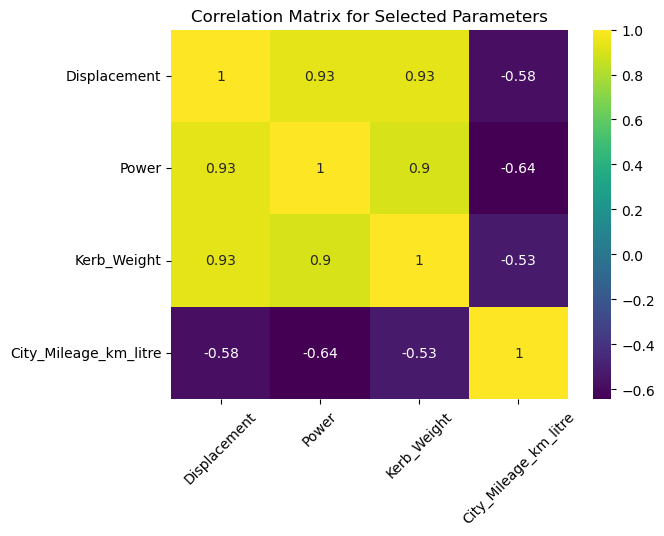

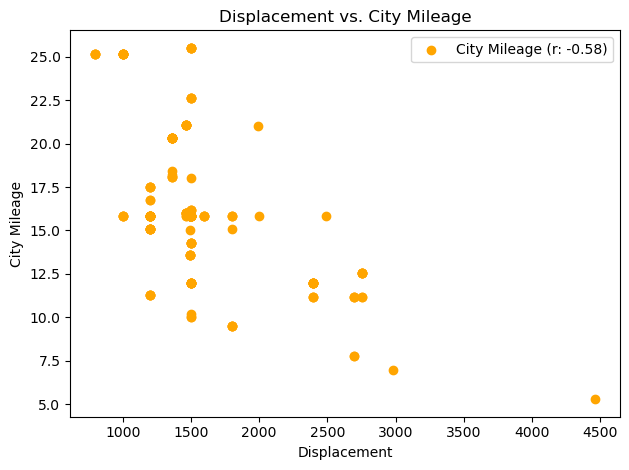

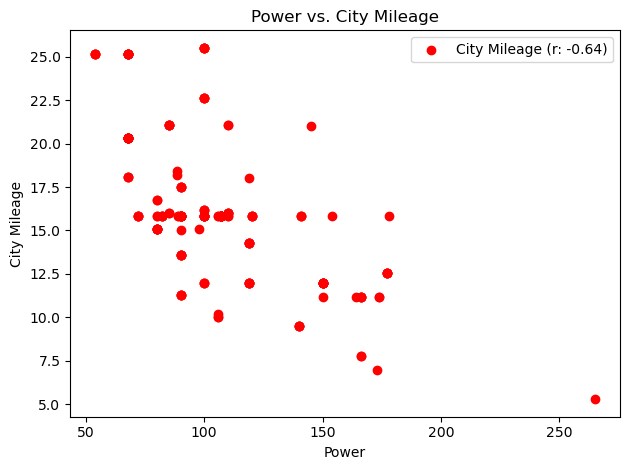

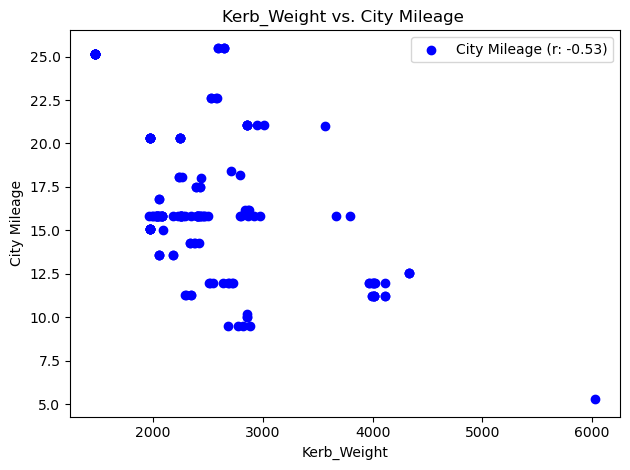


Interpretations:

1. Displacement and Mileage: There is strong negative correlation (-0.58) suggesting that as displacement increases, mileage decreases. Larger engines consume more fuel, leading to lower mileage.

2. Power and Mileage: There is stronger negative correlation (-0.64) indicating that cars with higher power outputs have lower mileage.

3. Kerb_Weight and Mileage: There is strong negative correlation (-0.53). Heavier cars require more energy to move, leading to lower fuel efficiency.


In [81]:
# Filtering data for the specified manufacturers
manus = ['Renault', 'Toyota', 'Honda']
filtered_data2 = car_data[car_data['Make'].isin(manus)]

# Calculating correlation coefficients
correlation_matrix = filtered_data2[['Displacement', 'Power', 'Kerb_Weight', 'City_Mileage_km_litre']].corr()

# Creating a heatmap to visualize correlations
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix for Selected Parameters')
plt.xticks(rotation=45) #rotating the x-axis labels for better readability
plt.show()

# Creating scatter plot to visualize relationship between Displacement vs. City Mileage
label = f'City Mileage (r: {correlation_matrix['Displacement']['City_Mileage_km_litre']:.2f})'  # Combine label and correlation
plt.scatter(filtered_data2['Displacement'], filtered_data2['City_Mileage_km_litre'], color='orange', label=label)
plt.title('Displacement vs. City Mileage')
plt.xlabel('Displacement')
plt.ylabel('City Mileage')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Creating scatter plot to visualize relationship between Power vs. City Mileage
label = f'City Mileage (r: {correlation_matrix['Power']['City_Mileage_km_litre']:.2f})'
plt.scatter(filtered_data2['Power'], filtered_data2['City_Mileage_km_litre'], color='red', label=label)
plt.title('Power vs. City Mileage')
plt.xlabel('Power')
plt.ylabel('City Mileage')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Creating scatter plot to visualize relationship between Kerb_Weight vs. City Mileage
label = f'City Mileage (r: {correlation_matrix['Kerb_Weight']['City_Mileage_km_litre']:.2f})'
plt.scatter(filtered_data2['Kerb_Weight'], filtered_data2['City_Mileage_km_litre'], color='blue', label=label)
plt.title('Kerb_Weight vs. City Mileage ')
plt.xlabel('Kerb_Weight')
plt.ylabel('City Mileage')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

#Interpretations
print('\nInterpretations:')
print('\n1. Displacement and Mileage: There is strong negative correlation (-0.58) suggesting that as displacement increases, mileage decreases. Larger engines consume more fuel, leading to lower mileage.')
print('\n2. Power and Mileage: There is stronger negative correlation (-0.64) indicating that cars with higher power outputs have lower mileage.')
print('\n3. Kerb_Weight and Mileage: There is strong negative correlation (-0.53). Heavier cars require more energy to move, leading to lower fuel efficiency.')

## Weight Distribution Study

### Task 14

Comparing the performance of cars of each manufacturer based on factors such as Kerb Weight and Gross Vehicle Weight:

Make                     Aston Martin        Audi Bajaj      Bentley  \
Mean                      3813.333333      3982.0   NaN  5407.233333   
Median                         3696.0      3916.0   NaN       5335.0   
Standard Deviation         516.102057  753.233651   NaN   268.974331   
Coefficient of Variation    13.534145   18.915963   NaN     4.974343   

Make                              Bmw Bugatti  Datsun      Dc     Ferrari  \
Mean                      3775.304762  4389.0  1900.8  3476.0     3594.25   
Median                         3751.0  4389.0  1900.8  3476.0      3470.5   
Standard Deviation         252.622348     0.0     0.0     NaN  449.627703   
Coefficient of Variation     6.691443     0.0     0.0     NaN   12.509639   

Make                             Fiat  ...       Nissan      Porsche  \
Mean                      2642.095238  ...  2834.333333  4297.

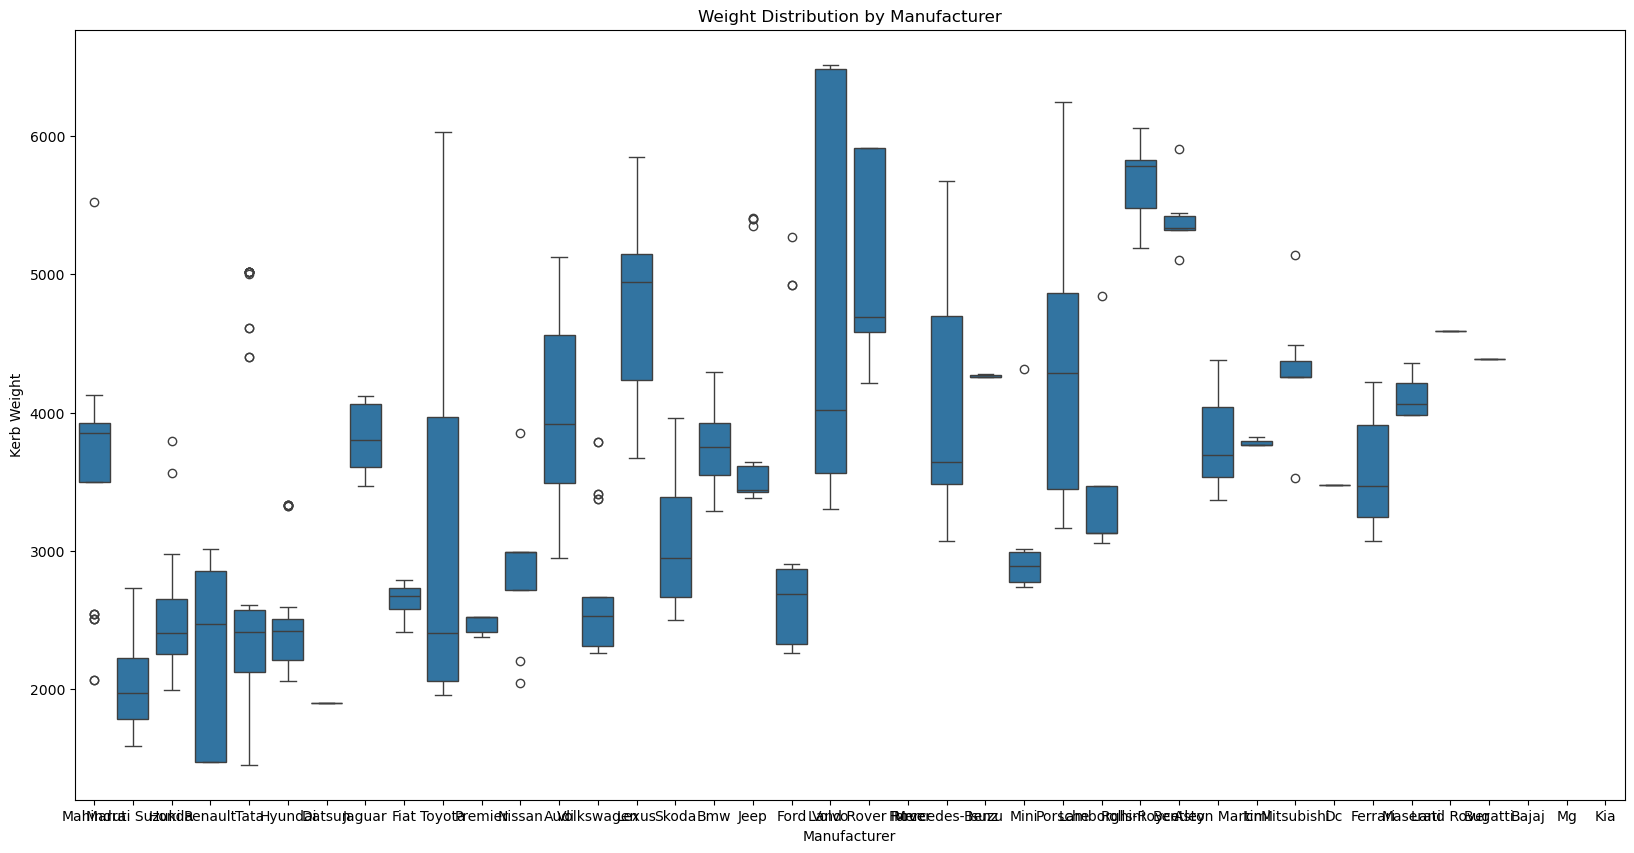


Interpretations:

1. Luxury brands like Bentley, Land Rover Rover and Rolls-Royce have significantly higher mean and median weights, reflecting their positioning as luxury vehicles.

2. Budget-friendly brands like Datsun, Maruti Suzuki and Renault have lower weights, targeting more budget-conscious consumers.

3. Manufacturers can position their vehicles based on weight. Heavier vehicles might appeal to those seeking luxury and safety while lighter vehicles might target fuel efficiency and agility.

4. Heavier vehicles might have higher manufacturing costs and potentially lower fuel efficiency.


In [84]:
# Calculating and displaying summary statistics for each manufacturer
summary_stats2 = car_data.groupby('Make')[['Kerb_Weight', 'Gross_Vehicle_Weight']].describe()

# Create a new DataFrame to store the results
stats_df2 = pd.DataFrame(index=['Mean', 'Median', 'Standard Deviation', 'Coefficient of Variation'], columns=summary_stats2.index)

# Populating the DataFrame with the calculated values
for manufacturer in summary_stats2.index:
    stats_df2.loc['Mean', manufacturer] = summary_stats2.loc[manufacturer, ('Kerb_Weight', 'mean')]
    stats_df2.loc['Median', manufacturer] = summary_stats2.loc[manufacturer, ('Kerb_Weight', '50%')]
    stats_df2.loc['Standard Deviation', manufacturer] = summary_stats2.loc[manufacturer, ('Kerb_Weight', 'std')]
    stats_df2.loc['Coefficient of Variation', manufacturer] = summary_stats2.loc[manufacturer, ('Kerb_Weight', 'std')] / summary_stats2.loc[manufacturer, ('Kerb_Weight', 'mean')] * 100

# Displaying Mean, Median, Standard Deviation, and Coefficient of Variation for each manufacturer
print('Comparing the performance of cars of each manufacturer based on factors such as Kerb Weight and Gross Vehicle Weight:\n')
print(stats_df2)

# Set the figure size
plt.figure(figsize=(20, 10))

# Creating box plots for weight distribution of each manufacturer
sns.boxplot(x='Make',
           y='Kerb_Weight',
           data=car_data)
plt.title('Weight Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Kerb Weight')
plt.show()

#Interpretations
print('\nInterpretations:')
print('\n1. Luxury brands like Bentley, Land Rover Rover and Rolls-Royce have significantly higher mean and median weights, reflecting their positioning as luxury vehicles.')
print('\n2. Budget-friendly brands like Datsun, Maruti Suzuki and Renault have lower weights, targeting more budget-conscious consumers.')
print('\n3. Manufacturers can position their vehicles based on weight. Heavier vehicles might appeal to those seeking luxury and safety while lighter vehicles might target fuel efficiency and agility.')
print('\n4. Heavier vehicles might have higher manufacturing costs and potentially lower fuel efficiency.')

# Unlocking Automotive Trends Project - Part 2

## Safety Feature Assessment

### Task 1

In [107]:
# Setting data type for Airbags as str
car_data['Airbags'] = car_data['Airbags'].astype(str)

# Splitting airbag types into individual values
car_data['Airbags'] = car_data['Airbags'].str.split(',')

# Filtering out rows with "Not Available" in "Airbags" and check for non-empty lists
filtered_data = car_data[car_data['Airbags'].apply(lambda x: len(x) > 0)]

# Creating a binary column indicating the presence of any airbag
car_data['Has_Airbags'] = car_data['Airbags'].apply(lambda x: len(x) > 0)

# Creating a mapping dictionary
mapping = {'Yes': 1, 'Not Available': 0}

# Applying the mapping to the columns
filtered_data['ABS_(Anti-lock_Braking_System)'] = filtered_data['ABS_(Anti-lock_Braking_System)'].replace(mapping)
filtered_data['Hill_Assist'] = filtered_data['Hill_Assist'].replace(mapping)

# Calculating the percentage of cars with each safety feature (assuming other columns are numeric)
safety_features = ['ABS_(Anti-lock_Braking_System)', 'Has_Airbags', 'Hill_Assist']
feature_pct = (filtered_data[safety_features].sum() / len(filtered_data)) * 100

# Printing the percentages
print("Percentage of cars with safety features:\n")
print(feature_pct)

# Grouping by manufacturer to analyze safety standards
manu_safety = filtered_data.groupby('Make')[safety_features].mean() * 100

# Printing manufacturer-wise safety standards
print("\nManufacturer-wise safety standards:\n")
print(manu_safety)

# Interpretations
print('\nInterpretations:')
print('\n1. Most of the cars (89.65%) have ABS(Anti-lock_Braking_System) in them improving safety to a huge extent.')
print('\n2. All manufacturers provide airbags in their cars.')
print('\n3. Few manufacturers (37.61%) have equipped their cars with Hill_Assist feature.')
print('\n4. Brands with all 3 safety features in all their cars are- Bentley, Bugatti, Ferrari, Jeep, Land Rover, Lexus and Volvo. All these are luxury brands and they have a huge focus on safety, but also cost much more than a budget car.')
print('\n5. Some budget friendly brands like Kia, Mg, Renault and Skoda are providing ABS and Airbags in all models showing their commitment to passenger safety.')

Percentage of cars with safety features:

ABS_(Anti-lock_Braking_System)     89.655172
Has_Airbags                       100.000000
Hill_Assist                        37.617555
dtype: float64

Manufacturer-wise safety standards:

                  ABS_(Anti-lock_Braking_System)  Has_Airbags  Hill_Assist
Make                                                                      
Aston Martin                           66.666667        100.0    66.666667
Audi                                  100.000000        100.0    93.548387
Bajaj                                   0.000000        100.0     0.000000
Bentley                               100.000000        100.0   100.000000
Bmw                                    97.297297        100.0    70.270270
Bugatti                               100.000000        100.0   100.000000
Datsun                                 62.500000        100.0     0.000000
Dc                                    100.000000        100.0     0.000000
Ferrari             

## User Comfort Exploration

### Task 2

In [91]:
# Calculating average seating capacity for each manufacturer
avg_seating = car_data.groupby('Make')['Seating_Capacity'].mean()

# Counting occurrences of central locking and child safety locks
cent_lock_count = car_data[car_data['Central_Locking'] == 'Yes']['Central_Locking'].count()
child_safety_lock_count = car_data[car_data['Child_Safety_Locks'] == 'Yes']['Child_Safety_Locks'].count()

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Printing the results
print("Average Seating Capacity for each Manufacturer:\n")
print(avg_seating)

print("\nCentral Locking Occurrence for all Models:")
print(cent_lock_count)

print("\nChild Safety Locks Occurrence for all Models:")
print(child_safety_lock_count)

# Interpretations
print('\nInterpretations:')
print('\n1. Seating Capacity: Most of the manufacturers provide Seating Capacity of 5 in their cars.')
print('\n2. Central Locking: 1127 out of 1275 models provide Central Locking as a feature for the comfort and safety of the passengers.')
print('\n3. Child Safety Locks: 1201 out of 1275 models provide Child Safety Locks as a feature for the comfort and safety of the passengers.')

Average Seating Capacity for each Manufacturer:

Make
Aston Martin        2.666667
Audi                5.193548
Bajaj               4.000000
Bentley             4.333333
Bmw                 4.594595
Bugatti             2.000000
Datsun              5.750000
Dc                  2.000000
Ferrari             2.500000
Fiat                5.000000
Force               5.666667
Ford                5.116279
Honda               5.312500
Hyundai             4.992308
Icml                8.454545
Isuzu               5.800000
Jaguar              3.966822
Jeep                5.000000
Kia                 5.476190
Lamborghini         2.230769
Land Rover          7.000000
Land Rover Rover    5.814815
Lexus               5.300000
Mahindra            6.514875
Maruti Suzuki       5.214724
Maserati            4.333333
Mercedes-Benz       4.947368
Mg                  5.000000
Mini                4.500000
Mitsubishi          7.000000
Nissan              4.965517
Porsche             4.252868
Premier           

## Alert Systems Analysis

### Task 3

In [93]:
# Converting "Yes" and "Not Available" to binary values
filtered_data['High_Speed_Alert_System'] = filtered_data['High_Speed_Alert_System'].replace({'Yes': 1, 'Not Available': 0})
filtered_data['Fasten_Seat_Belt_Warning'] = filtered_data['Fasten_Seat_Belt_Warning'].replace({'Yes': 1, 'Not Available': 0})
filtered_data['Door_Ajar_Warning'] = filtered_data['Door_Ajar_Warning'].replace({'Yes': 1, 'Not Available': 0})

# Calculating the percentage of cars with each safety feature
safety_features = ['High_Speed_Alert_System', 'Fasten_Seat_Belt_Warning', 'Door_Ajar_Warning']
feature_percentages = (filtered_data[safety_features].sum() / len(filtered_data)) * 100

# Grouping by manufacturer to analyze safety standards
manufacturer_safety = filtered_data.groupby('Make')[safety_features].mean() * 100

# Printing the percentages
print("Percentage of cars with safety features:\n")
print(feature_percentages)

# Printing manufacturer-wise safety standards
print("\nManufacturer-wise safety standards:\n")
print(manufacturer_safety)

# Interpretations
print('\nInterpretations:')
print('\n1. High_Speed_Alert_System: Very few manufacturers (only 16.3%) provide High_Speed_Alert_System in their cars which an important alarming feature to control overspeeding.')
print('\n2. Fasten_Seat_Belt_Warning: Most manufacturers (85.1%) provide Fasten_Seat_Belt_Warning in their cars for the comfort and safety of the passengers.')
print('\n3. Door_Ajar_Warning: Most manufacturers (88.7%) provide Door_Ajar_Warning in their cars for the comfort and safety of the passengers. It alerts if any door is accidently left open.')
print('\n4. Only Bugatti provides all 3 of these features in all their cars for the ultimate comfort and safety of the passengers.')

Percentage of cars with safety features:

High_Speed_Alert_System     16.300940
Fasten_Seat_Belt_Warning    85.109718
Door_Ajar_Warning           88.793103
dtype: float64

Manufacturer-wise safety standards:

                  High_Speed_Alert_System  Fasten_Seat_Belt_Warning  \
Make                                                                  
Aston Martin                     0.000000                100.000000   
Audi                            19.354839                100.000000   
Bajaj                          100.000000                  0.000000   
Bentley                          0.000000                100.000000   
Bmw                             35.135135                100.000000   
Bugatti                        100.000000                100.000000   
Datsun                           0.000000                 75.000000   
Dc                               0.000000                100.000000   
Ferrari                          0.000000                100.000000   
Fiat      

## Dimensional Analysis

### Task 4

In [97]:
# Calculating overall averages and standard deviations
overall_avgs = car_data[['Height_mm', 'Length_mm', 'Width_mm']].mean()
overall_std_devs = car_data[['Height_mm', 'Length_mm', 'Width_mm']].std()

print("\nOverall Averages of Dimensions for all Cars:\n")
print(overall_avgs)

print("\nOverall Standard Deviations of Dimensions for all Cars:\n")
print(overall_std_devs)

# Calculate average dimensions for each body type
body_type_averages = car_data.groupby('Body_Type')[['Height_mm', 'Length_mm', 'Width_mm']].mean()

# Print the results
print("\nAverage Dimensions of Cars for each Body Type:\n")
print(body_type_averages)

# Calculate average dimensions for each manufacturer
manufacturer_averages = car_data.groupby('Make')[['Height_mm', 'Length_mm', 'Width_mm']].mean()

# Print the results
print("\nAverage Dimensions of Cars by each Manufacturer:\n")
print(manufacturer_averages)

# Interpretations
print('\nInterpretations:')
print('\n1. Datsun, Hyundai, Maruti Suzuki, Mini and Tata make the budget friendly small cars.')
print('\n2. Bentley, Land Rover, Maserati and Rolls-Royce make the most spacious and long luxury cars which are very costly.')
print('\n3. Hatchback and Sports Hatchback are the smallest body types which manufacturers make.')


Overall Averages of Dimensions for all Cars:

Height_mm    1592.539608
Length_mm    4296.883730
Width_mm     1788.550506
dtype: float64

Overall Standard Deviations of Dimensions for all Cars:

Height_mm    151.609728
Length_mm    476.612977
Width_mm     150.220482
dtype: float64

Average Dimensions of Cars for each Body Type:

                       Height_mm    Length_mm     Width_mm
Body_Type                                                 
Convertible          1355.400000  4659.650000  1905.450000
Coupe                1301.647308  4648.829268  1947.306110
Coupe, Convertible   1211.000000  4568.000000  1952.000000
Crossover            1565.944444  4019.277778  1721.888889
Crossover, SUV       1612.000000  4439.000000  1940.500000
Hatchback            1544.882911  3794.297468  1675.971519
MPV                  1669.076923  4214.153846  1701.025641
MUV                  1772.461538  4668.435897  1821.512821
Pick-up              1845.000000  5295.000000  1860.000000
SUV                 

# Summary

1. SUV is the most preferred car body type followed by Sedan and Hatchback.
2. Only 2 cars can adapt to various driving conditions such as normal, comfort, eco, sport, and power and both are made by Audi.
3. Mahindra has the highest city mileage (110) of all manufacturers. It is an outlier between all manufacturers as its car is electric in nature, thereby recording extraordinary city mileage.
4. Maruti Suzuki has the highest city mileage (28.4) of all manufacturers which make non-electric cars, followed by Honda and Renault.
5. Renault has the highest combined fuel efficiency in urban conditions, while Skoda is the worst. Hyundai and Skoda indicate relatively consistent  fuel efficiency for city and highway.
6. Renault has the highest average city and highway mileage of all manufacturers, followed by Mahindra and Maruti Suzuki.
7. BMW has the most skewed mileage distribution.There are few outliers present in the Fuel Economy Distribution for Tata and BMW.
8. Aston Martin, Bentley, Bugatti, Ferrari, Lamborghini and Rolls-Royce have higher mean and median displacements, indicating larger engines.
9. Bentley, Ferrari, Jaguar, Land Rover Rover and Mercedes-Benz have higher standard deviations, suggesting more variation in their engine sizes.
10. Aston Martin, Bentley, Bugatti, Lamborghini and Rolls-Royce have higher mean cylinder counts, meaning they use more cylinders on average.
11. Most manufacturers have a mean of 4 valves per cylinder. Audi, Lamborghini, Lexus and Nissan have higher, indicating more advanced engine designs.
12. Displacement and Mileage: There is strong negative correlation (-0.58) meaning as displacement increases, mileage decreases. Larger engines consume more fuel, leading to lower mileage.
13. Power and Mileage: There is stronger negative correlation (-0.64) indicating that cars with higher power outputs have lower mileage.
14. Kerb_Weight and Mileage: There is strong negative correlation (-0.53). Heavier cars require more energy to move, leading to lower fuel efficiency.
15. Luxury brands like Bentley, Land Rover Rover and Rolls-Royce have significantly higher weights, reflecting their positioning as luxury vehicles.
16. Budget-friendly brands like Datsun, Maruti Suzuki and Renault have lower weights, targeting more budget-conscious consumers with higher mileage.
17. Most of the cars have ABS(Anti-lock_Braking_System) in them improving safety to a huge extent. All manufacturers provide airbags in their cars. Few manufacturers have equipped their cars with Hill_Assist feature.
18. Most of the manufacturers provide Seating Capacity of 5 in their cars.
19. Most models provide Central Locking, Child Safety Locks, Fasten_Seat_Belt_Warning, Door_Ajar_Warning for the comfort and safety of the passengers.
20. Very few manufacturers provide High_Speed_Alert_System in their cars which is important to control overspeeding.
21. Datsun, Hyundai, Maruti Suzuki, Mini and Tata make the budget friendly small cars.
22. Bentley, Land Rover, Maserati and Rolls-Royce make the most spacious and long luxury cars which are very costly.
23. Hatchback and Sports Hatchback are the smallest body types which manufacturers make.

# Business Conclusions

1. As a manufacturer, any new model to be launched should be of SUV, Sedan or Hatchback body type. They are very popular and hot-selling.
2. Any manufacturer focusing on budget or highly fuel efficient cars should consider launching an electric car.
3. Most luxury car makers use larger engines with more number of cylinders for extracting higher performance.
4. Luxury brands have a huge focus on safety, but also cost much more than a budget car.
5. Any new vehicle to be launched, regardless of segment should have these safety features as standard across models- ABS(Anti-lock_Braking_System), Airbags, Central Locking, Child Safety Locks, Fasten_Seat_Belt_Warning, Door_Ajar_Warning, High_Speed_Alert_System and Hill_Assist.
6. Most manufacturers have cars with 4 valves per cylinder. Some performance oriented brands have more, indicating more advanced engine designs.
7. Manufacturers with lower mean values for displacement, cylinders, and valves per cylinder are able to offer more affordable cars.
8. Manufacturers with higher displacement and cylinder counts target customers seeking powerful and performance-oriented vehicles.
9. Manufacturers with lower displacement and fewer cylinders focus on fuel efficiency, environmental friendliness and budget friendly cars.
10. Manufacturers can differentiate their products based on engine specifications, targeting specific market segments.
11. Manufacturers can position their vehicles based on weight. Heavier vehicles might appeal to those seeking luxury and safety while lighter vehicles might target fuel efficiency and agility.
12. Cars with larger engines and higher power outputs consume more fuel and have lower mileage.
13. Heavier vehicles might have higher manufacturing costs and potentially lower fuel efficiency as they require more energy to move.
15. Audi makes the most dynamic cars that can adapt to various driving conditions. Their competitors should improve in this area.
16. Skoda as a budget friendly car manufacturer should focus on improving fuel efficiency of their cars which is very poor.

# Challenges Faced

1. A lot of data preprocessing was needed to be done. For example, counting the number of missing values in each column and performing missing value treatment. Replacing the missing values with the mean or median for numerical columns based on the existing values within the same manufacturer's group and replacing the missing values in categorical columns with "Not Available".
2. Conversion of data types for few columns was needed for mathematical operations and further data analysis.
3. Meticulous graphs and charts were needed to be created and interpret correctly for deep dive analysis of data.

# Future Scope

1. Advanced Statistical Analysis:

Regression Analysis: Model the relationship between independent variables (e.g., displacement, weight) and dependent variables (e.g., fuel efficiency, acceleration) to make predictions or understand causal relationships.
Time Series Analysis: If you have data over time, analyze trends in car features, prices, or sales to identify patterns and forecast future trends.

2. Consumer Preference Analysis:

Market Segmentation: Identify distinct groups of consumers based on their preferences for car features (e.g., size, fuel efficiency, safety).
Sentiment Analysis: Analyze customer reviews and social media data to understand consumer sentiment towards specific car models or features.
Price Sensitivity Analysis: Assess how price affects consumer preferences and demand for different car segments.

3. Competitive Analysis:

Benchmarking: Compare products or services to competitors in terms of performance, features, and pricing.
Market Share Analysis: Track market share trends for different car manufacturers and identify growth opportunities.
Competitive Intelligence: Gather information on competitors' strategies, product launches, and marketing campaigns.

4. Sustainability and Environmental Impact:

Carbon Footprint Analysis: Evaluate the carbon footprint of different car models and identify opportunities for reducing emissions.
Electric Vehicle Analysis: Deepen the analysis of electric vehicles, including battery technology, charging infrastructure, and range.
Sustainability Metrics: Develop metrics to assess the sustainability of cars based on factors like fuel efficiency, emissions, and recyclability.

5. Advanced Data Visualization:

Interactive Dashboards: Create interactive dashboards to visualize key metrics and trends.
3D Visualizations: Use 3D visualizations to explore relationships between multiple variables (e.g., size, performance, price).
Geographic Analysis: Analyze car sales and preferences based on geographic location.